# Daily Household Transactions EDA

### Data Loading

In [145]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm


import seaborn as sns

In [146]:
# read the csv file
data = pd.read_csv('Daily Household Transactions.csv')
# Display the first few rows of the dataframe
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [147]:
data['Date'].dtype


dtype('O')

### Data understanding

In [148]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


### Data Cleaning

In [149]:
data['Date'] = pd.to_datetime(
    data['Date'],
    dayfirst=True,
    errors='coerce'
)
data = data.dropna(subset=['Date'])


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 2420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            1303 non-null   object        
 2   Category        1303 non-null   object        
 3   Subcategory     1041 non-null   object        
 4   Note            1162 non-null   object        
 5   Amount          1303 non-null   float64       
 6   Income/Expense  1303 non-null   object        
 7   Currency        1303 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 91.6+ KB


In [150]:
# Extract Year, Month, Day, month name and Day of Week from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['MonthName'] = data['Date'].dt.month_name()
data['DayOfWeek'] = data['Date'].dt.day_name()

data[['Date', 'Year', 'Month', 'Day', 'MonthName', 'DayOfWeek']].head()



,Date,Year,Month,Day,MonthName,DayOfWeek
0,2018-09-20 12:04:08,2018,9,20,September,Thursday
1,2018-09-20 12:03:15,2018,9,20,September,Thursday
3,2018-09-17 23:41:17,2018,9,17,September,Monday
4,2018-09-16 17:15:08,2018,9,16,September,Sunday
5,2018-09-15 06:34:17,2018,9,15,September,Saturday


In [151]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Year,Month,Day,MonthName,DayOfWeek
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,2018,9,20,September,Thursday
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,2018,9,20,September,Thursday
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,2018,9,17,September,Monday
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,2018,9,16,September,Sunday
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR,2018,9,15,September,Saturday


In [152]:
data.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       262
Note              141
Amount              0
Income/Expense      0
Currency            0
Year                0
Month               0
Day                 0
MonthName           0
DayOfWeek           0
dtype: int64

In [153]:
# fill missing values in Subcategory with 'Others' and 'Not specified' with unknown
data['Subcategory'] = data['Subcategory'].fillna('Others')
data['Note'] = data['Note'].fillna('Not Specified')


In [154]:
data.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
Year              0
Month             0
Day               0
MonthName         0
DayOfWeek         0
dtype: int64

In [155]:

data.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

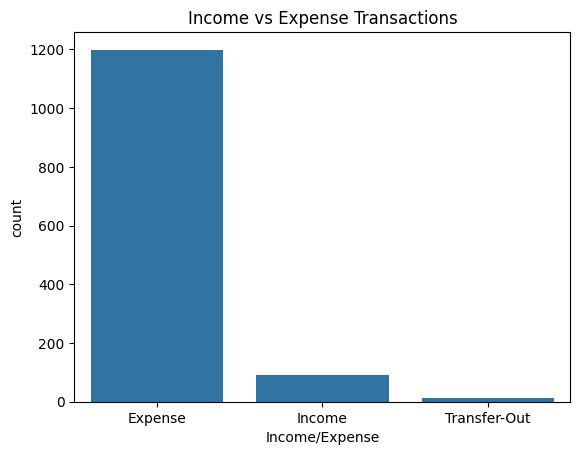

In [156]:
# Transaction Type Distribution
sns.countplot(data=data, x="Income/Expense")
plt.title("Income vs Expense Transactions")
plt.show()


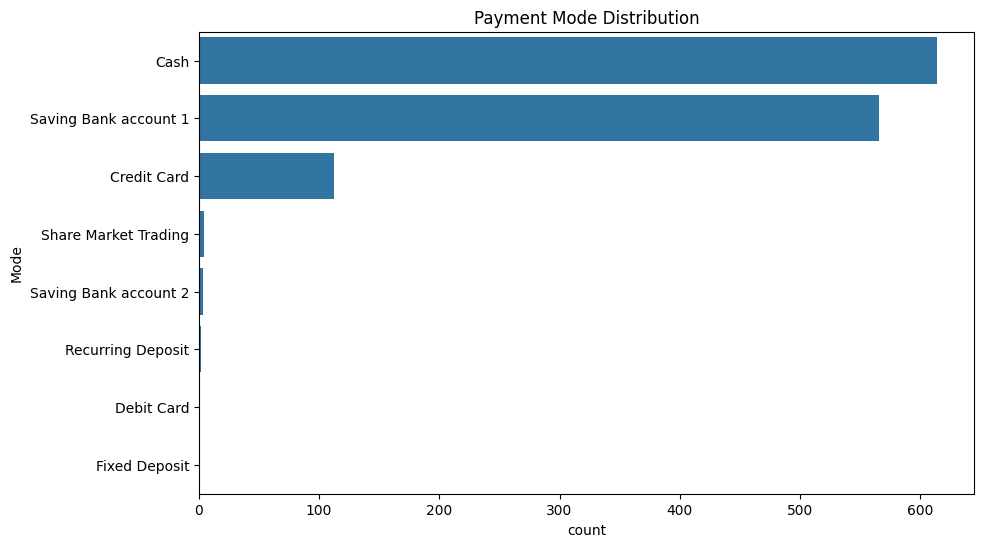

In [157]:
# Payment Mode Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="Mode", order=data['Mode'].value_counts().index)
plt.title("Payment Mode Distribution")
plt.show()

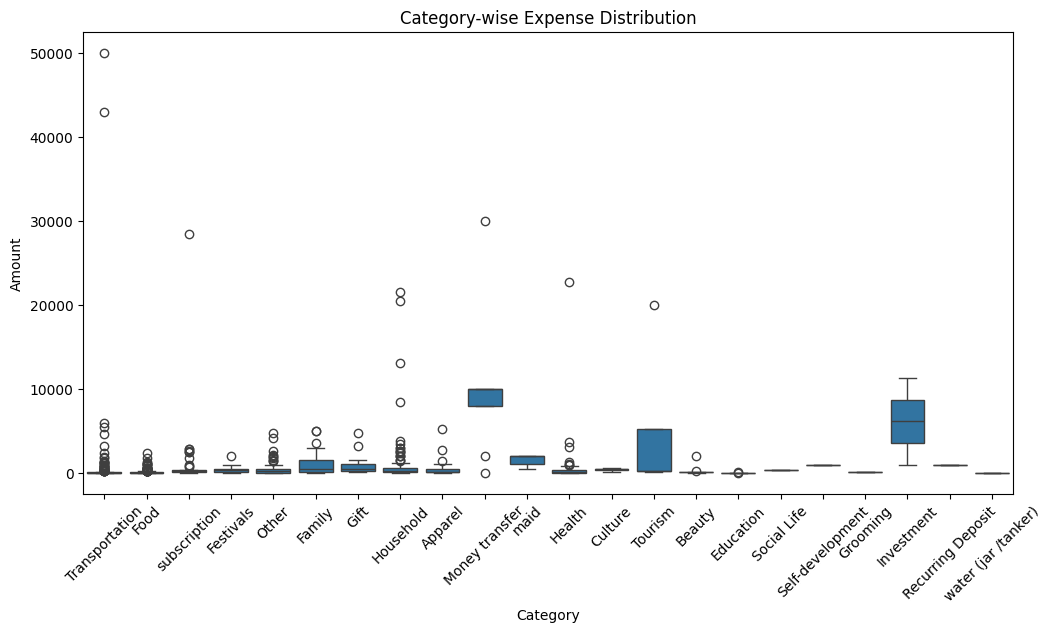

In [158]:
# Category vs Amount (Outlier Detection)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data['Income/Expense'] == 'Expense'], x='Category', y='Amount')
plt.title("Category-wise Expense Distribution")
plt.xticks(rotation=45)
plt.show()

In [159]:
# Income vs Expense Split
expense_data = data[data['Income/Expense'] == 'Expense']
income_data = data[data['Income/Expense'] == 'Income']



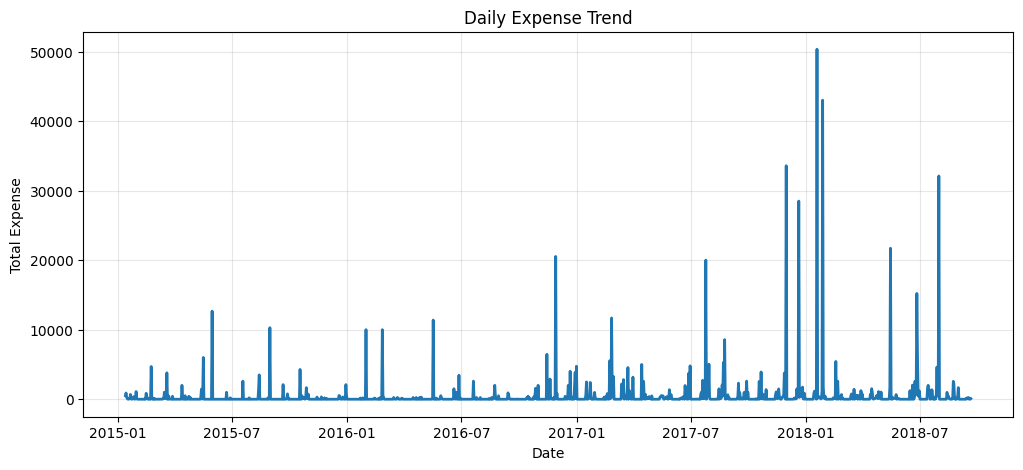

In [160]:
# monthly expense trend

data = data.set_index('Date')

daily_expense = (
    data[data['Income/Expense'] == 'Expense']
    .resample('D')['Amount']
    .sum()
)

plt.figure(figsize=(12,5))
plt.plot(daily_expense, linewidth=2)
plt.title('Daily Expense Trend')
plt.xlabel('Date')
plt.ylabel('Total Expense')
plt.grid(alpha=0.3)
plt.show()


C:\Users\anous\AppData\Local\Temp\ipykernel_12688\1702825244.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Amount']


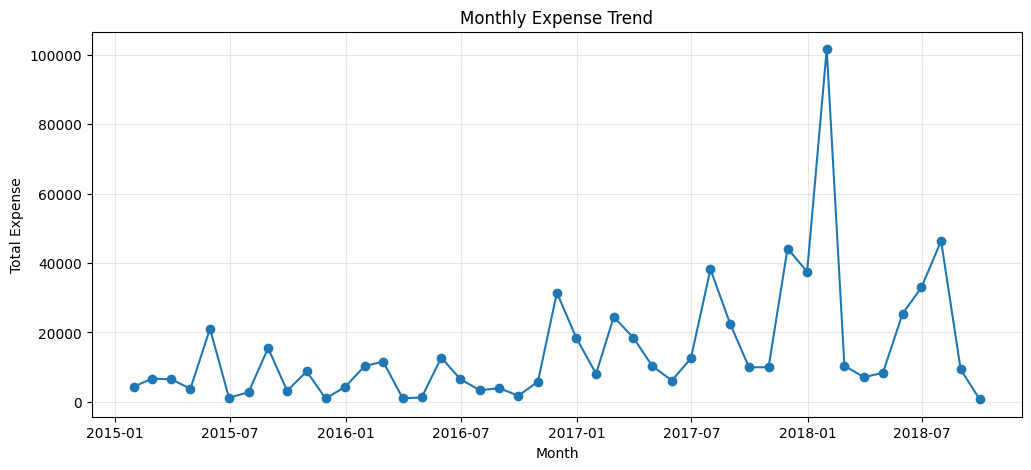

In [161]:
monthly_expense = (
    data[data['Income/Expense'] == 'Expense']
    .resample('M')['Amount']
    .sum()
)

plt.figure(figsize=(12,5))
plt.plot(monthly_expense, marker='o')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.grid(alpha=0.3)
plt.show()


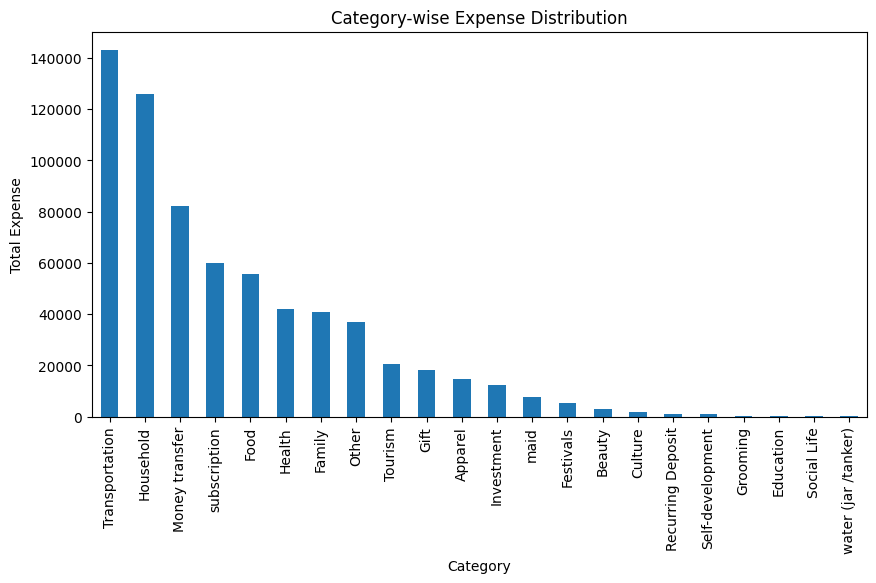

In [162]:
# Category-Wise Expense Analysis
category_expense = (
    expense_data.groupby('Category')['Amount']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
category_expense.plot(kind='bar')
plt.title("Category-wise Expense Distribution")
plt.ylabel("Total Expense")
plt.show()


C:\Users\anous\AppData\Local\Temp\ipykernel_12688\1872241988.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key='Date', freq='M'), 'Category'])['Amount']
C:\Users\anous\AppData\Local\Temp\ipykernel_12688\1872241988.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(category_monthly.columns))


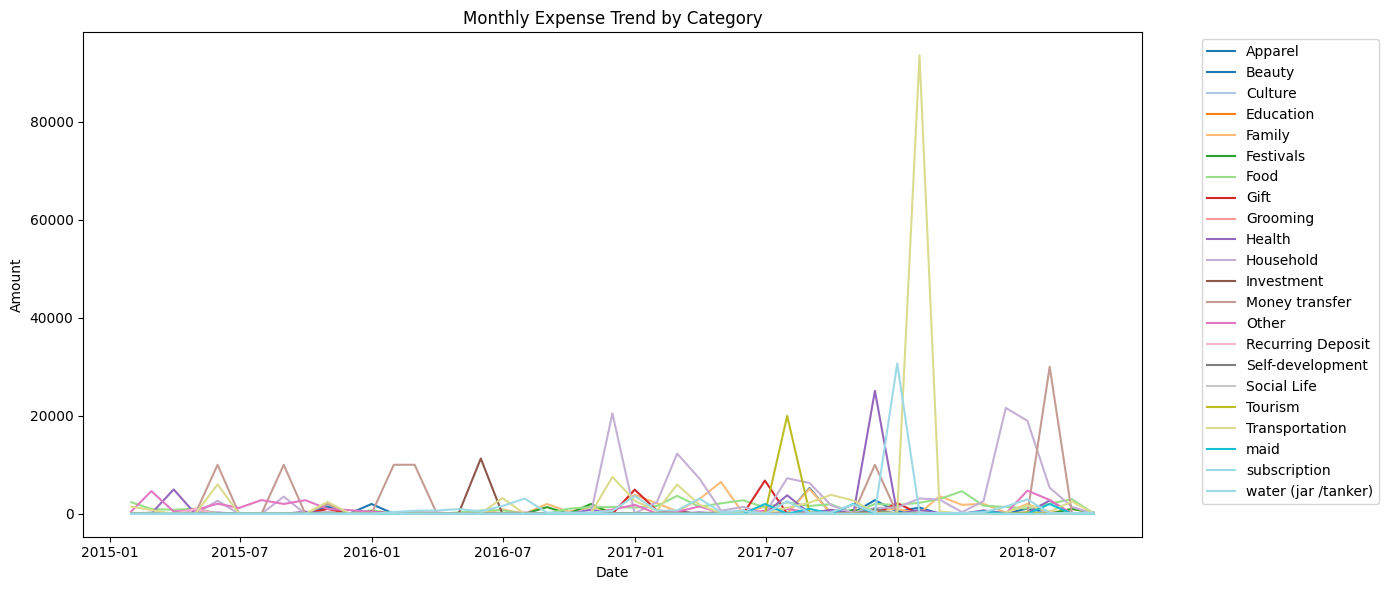

In [163]:
# mothly expense per category

category_monthly = (
    expense_data
    .groupby([pd.Grouper(key='Date', freq='M'), 'Category'])['Amount']
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14,6))

colors = cm.get_cmap('tab20', len(category_monthly.columns))

for i, category in enumerate(category_monthly.columns):
    plt.plot(category_monthly.index, category_monthly[category],
             label=category, color=colors(i))

plt.title('Monthly Expense Trend by Category')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

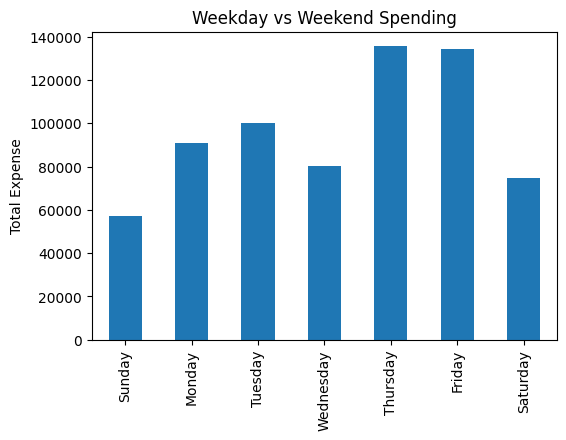

In [164]:
# Weekday vs Weekend Spending
weekday_summary = expense_data.groupby('DayOfWeek')['Amount'].sum()

weekday_summary.index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

weekday_summary.plot(kind='bar', figsize=(6,4))
plt.title("Weekday vs Weekend Spending")
plt.ylabel("Total Expense")
plt.show()



In [165]:
# Top 10 Highest Expenses
top_expenses = expense_data.sort_values('Amount', ascending=False).head(10)
top_expenses[['Category','Subcategory','Amount']]


,Category,Subcategory,Amount
608,Transportation,Bike,50000.0
582,Transportation,Bike,43000.0
102,Money transfer,Home,30000.0
706,subscription,Edtech Course,28400.0
771,Health,Health,22700.0
268,Household,Appliances,21500.0
1780,Household,Appliances,20500.0
1137,Tourism,Trip,20000.0
218,Household,Appliances,13050.0
1963,Investment,LIC,11286.0


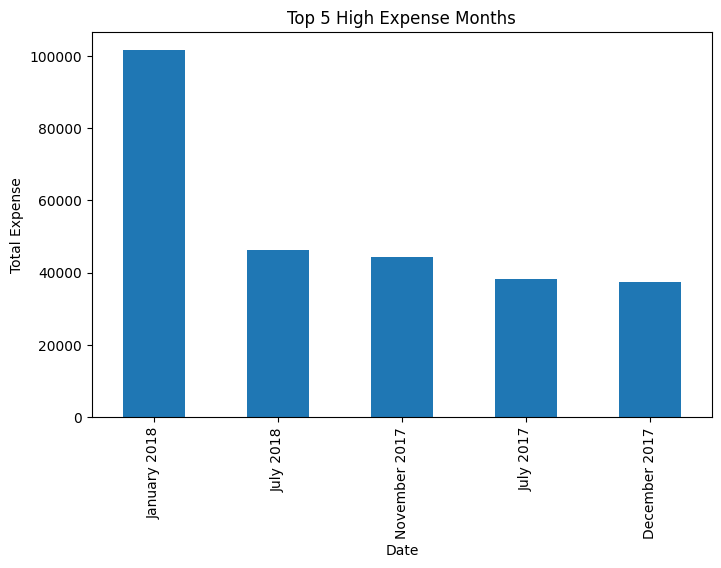

In [168]:
# top 5 high expense months
top_months = monthly_expense.sort_values(ascending=False).head(5)
top_months.index = top_months.index.strftime('%B %Y')
top_months.plot(kind='bar', figsize=(8,5))
plt.title("Top 5 High Expense Months")
plt.ylabel("Total Expense") 
plt.show()


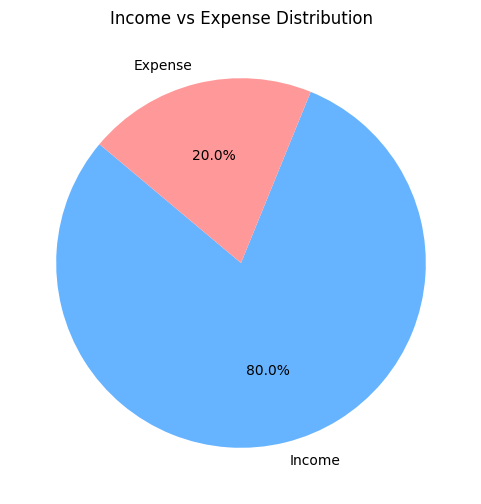

In [176]:
# Sum of Amount distribution of income and expense
income_sum = income_data['Amount'].sum()
expense_sum = expense_data['Amount'].sum()
labels = ['Income', 'Expense']
sizes = [income_sum, expense_sum]
colors = ['#66b3ff','#ff9999']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Income vs Expense Distribution")
plt.show()



In [179]:
# sum of income and expense
total_income = data[data['Income/Expense'] == 'Income']['Amount'].sum()
total_expense = data[data['Income/Expense'] == 'Expense']['Amount'].sum()
net_savings = total_income - total_expense

print(f"💰 Total Income   : ₹{total_income:,.0f}")
print(f"💸 Total Expense  : ₹{total_expense:,.0f}")
print(f"💾 Net Savings   : ₹{net_savings:,.0f}")


💰 Total Income   : ₹2,682,607
💸 Total Expense  : ₹672,563
💾 Net Savings   : ₹2,010,044


### Business Insights

#### 1. Expense Behavior

Expenses occur consistently every month, indicating stable household spending patterns.

Certain categories (e.g., Food, Groceries, Utilities) contribute the largest share of total expenses, making them primary cost drivers.

Expense spikes are visible in specific months, suggesting seasonal or event-based spending (festivals, travel, emergencies).

#### 2. Income Stability

Income remains relatively stable across months, showing predictable cash inflow.

The gap between income and expense varies month-to-month, directly impacting savings.

Months with higher expenses but flat income reduce net savings significantly.

#### 3. Savings & Cash Flow

Net savings fluctuate due to expense variability rather than income changes.

Some months show near-zero or negative savings, which could indicate financial stress periods.

A strong correlation exists between discretionary spending and reduced savings.

#### 4. Category-Level Insights

A small number of categories account for most of the expenses (Pareto principle).

Optional or lifestyle categories show high variance, offering cost-optimization opportunities.

Uncategorized or “Other” expenses suggest a need for better expense labeling.



### Recommendations
#### 1. Improve Expense Control

Focus on top 3 expense categories to achieve maximum savings impact.

Set monthly category-wise budgets based on historical averages.

#### 2. Increase Savings Consistency

Introduce a fixed savings target before discretionary spending.

Track monthly savings percentage to monitor financial health.

#### 3. Reduce Volatility

Identify months with expense spikes and plan ahead for predictable events.

Create an emergency buffer fund to handle irregular expenses.

#### 4. Enhance Data Quality

Reduce “Others” and null categories by improving expense classification.

Add notes consistently to improve future analysis and insights.

#### 5. Automation & Monitoring

Build a monthly expense dashboard for real-time monitoring.

Enable alerts when expenses exceed defined thresholds.

#### Conclusion

This project demonstrates a complete end-to-end financial data analysis workflow, covering:

Data cleaning and feature engineering

Time-series analysis of income and expenses

Category-level spending insights

Business-focused interpretation and recommendations

The analysis provides actionable insights to improve financial planning, optimize expenses, and strengthen savings behavior.
With further enhancements such as predictive forecasting and dashboard deployment, this project can evolve into a full personal finance analytics system.